Импорт

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from pandas import DataFrame
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy

In [138]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

In [139]:
from sklearn.metrics import make_scorer
Model_choice = pd.DataFrame(columns=['Model', 'MAE', 'R squared'])
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor

In [140]:
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras import Sequential
from keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasRegressor
from matplotlib import pyplot as plt

print(tf.__version__)


2.8.2


Загружаем исходные данные, создаем датафреймы

In [141]:
#Загружаем с гугл-диска файл с данными базальтопластика, создаем датафрейм
df_bp = pd.read_excel("/content/drive/MyDrive/myVKR/Data/X_bp.xlsx",index_col=0)
df_bp.head (5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [142]:
#Загружаем с гугл-диска файл с данными о нашивках углепластика, создаем датафрейм
df_nup = pd.read_excel("/content/drive/MyDrive/myVKR/Data/X_nup.xlsx",index_col=0)
df_nup.head (5)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.0,57.0
1.0,0.0,4.0,60.0
2.0,0.0,4.0,70.0
3.0,0.0,5.0,47.0
4.0,0.0,5.0,57.0


In [143]:
#Проверим датафреймы на количество строк и столбцов
print(df_bp.shape)
print(df_nup.shape)

(1023, 10)
(1040, 3)


In [144]:
#Проверим датафрейм на пропуски данных. 
df_nup.isna().sum()

Угол нашивки, град    0
Шаг нашивки           0
Плотность нашивки     0
dtype: int64

пропуски отсутствуют

In [145]:
df_bp.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

пропуски отсутствуют

In [146]:
print(df_nup.dtypes)
print(df_bp.dtypes)

Угол нашивки, град    float64
Шаг нашивки           float64
Плотность нашивки     float64
dtype: object
Соотношение матрица-наполнитель         float64
Плотность, кг/м3                        float64
модуль упругости, ГПа                   float64
Количество отвердителя, м.%             float64
Содержание эпоксидных групп,%_2         float64
Температура вспышки, С_2                float64
Поверхностная плотность, г/м2           float64
Модуль упругости при растяжении, ГПа    float64
Прочность при растяжении, МПа           float64
Потребление смолы, г/м2                 float64
dtype: object


In [147]:
#Объединим два датафрейма в один
df_nup_bp = df_nup.join(df_bp,  how='inner')

In [148]:
#Количество строк и столбцов в объединенном датафрейме
print(df_nup_bp.shape)

(1023, 13)


In [149]:
df_nup_bp.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

**Разведочный анализ данных**

In [150]:
#Информация о датафрейме
df_nup_bp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   float64
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность п

In [151]:
#Проверим датафрейм на пропуски данных. 
df_nup_bp.isna().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

пропусков нет

In [152]:
#Посмотрим количество уникальных записей
df_nup_bp.nunique()

Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
dtype: int64

**Основные статистические характеристики (описательная статистика)**

In [153]:
df_nup_bp.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
"Угол нашивки, град",1023.0,44.25,45.02,0.00,0.00,0.00,90.00,90.00
Шаг нашивки,1023.0,6.90,2.56,0.00,5.08,6.92,8.59,14.44
Плотность нашивки,1023.0,57.15,12.35,0.00,49.80,57.34,64.94,103.99
Соотношение матрица-наполнитель,1023.0,2.93,0.91,0.39,2.32,2.91,3.55,5.59
"Плотность, кг/м3",1023.0,1975.73,73.73,1731.76,1924.16,1977.62,2021.37,2207.77
"модуль упругости, ГПа",1023.0,739.92,330.23,2.44,500.05,739.66,961.81,1911.54
"Количество отвердителя, м.%",1023.0,110.57,28.30,17.74,92.44,110.56,129.73,198.95
"Содержание эпоксидных групп,%_2",1023.0,22.24,2.41,14.25,20.61,22.23,23.96,33.00
"Температура вспышки, С_2",1023.0,285.88,40.94,100.00,259.07,285.90,313.00,413.27
"Поверхностная плотность, г/м2",1023.0,482.73,281.31,0.60,266.82,451.86,693.23,1399.54


**Гистаграммы распределения**

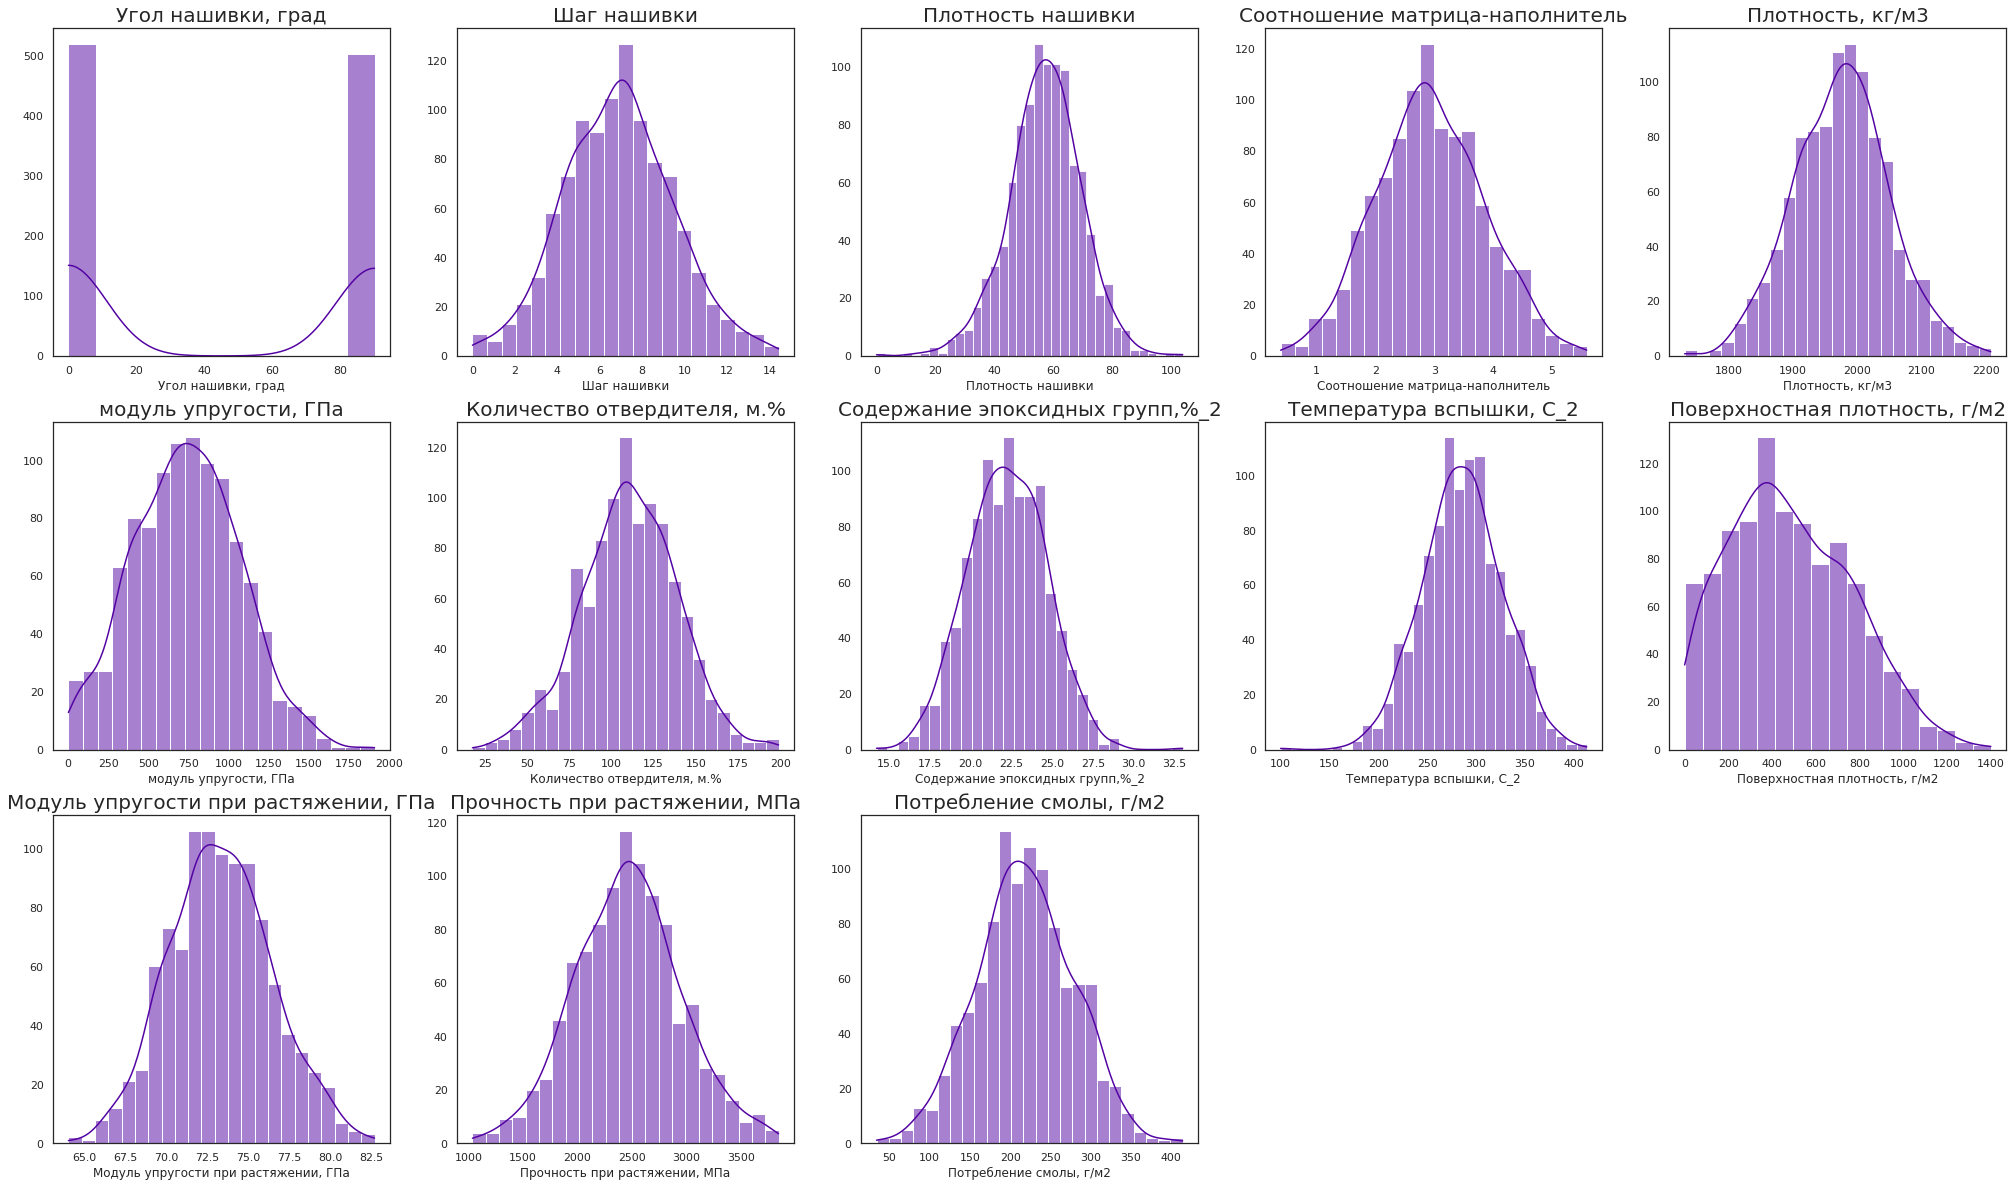

In [154]:
a = 5
b = 5
c = 1

plt.figure(figsize=(35,35))

for col in df_nup_bp.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.histplot(data = df_nup_bp[col], kde=True)
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c+=1

Для большинства характеристик распределение близко к нормальному.
Исключение составляют:
 - Поверхностная плотность, г/м2 - нормальное распределение со смещением вправо. Что свидетельствует о большем количестве измерений с меньшим показателем поверхностной алотности
 - Угол нашивки, град - дискретное распределение, так как колонка содержит всего два уникальных значения

**Диаграммы "Ящик с усами"**

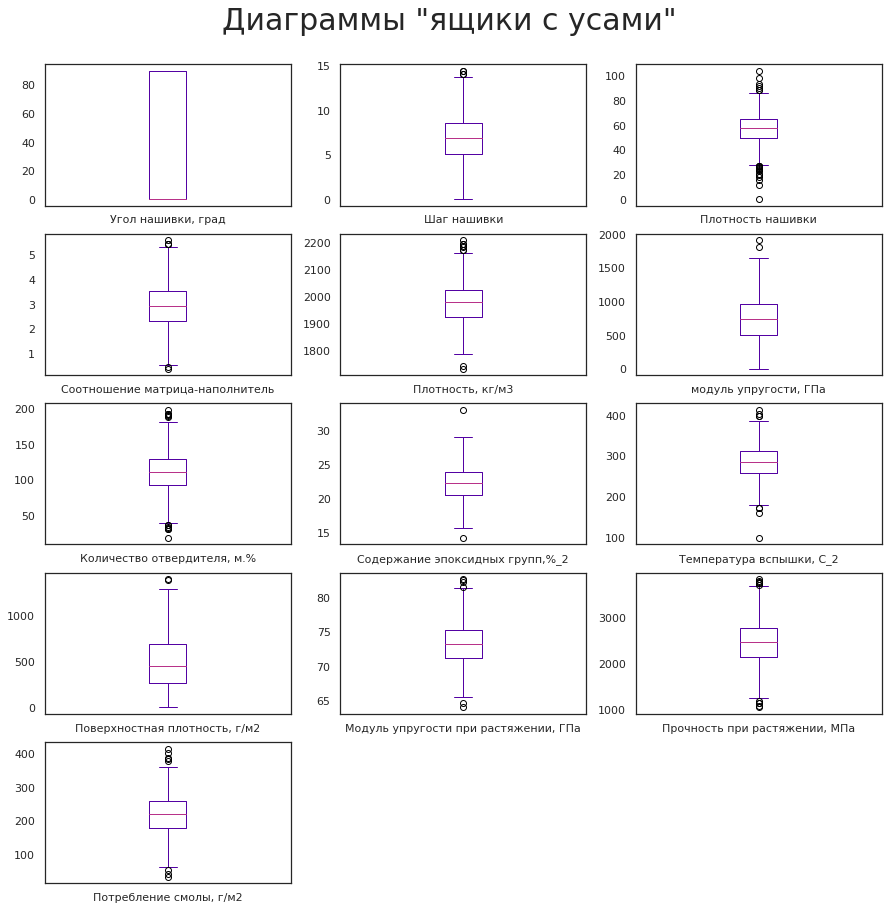

In [155]:
fig = plt.figure(figsize=(15,40))
fig.suptitle('Диаграммы "ящики с усами"', y = 0.9 ,
             fontsize = 30)
total_axes = len(df_nup_bp.columns) 
subplt = 1 
for x in df_nup_bp.columns:
    ax = fig.add_subplot(total_axes, 3, subplt)
    df_nup_bp[x].plot(kind="box")
   
    subplt+=1

plt.show()

По диаграммам "Ящик с усами" фиксируем выбросы по всем переменным, кроме переменной "Угол нашивки", для которой эта диаграмма неинформативна.

Построим попарные графики рассеяния

In [156]:
sns.set(
    style="white",
    palette="plasma"
)
g = sns.PairGrid(df_nup_bp, diag_sharey = True, height=4)
g.map_diag(sns.histplot,kde = True)
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)
plt.show

Output hidden; open in https://colab.research.google.com to view.

Попарные графики рассеяния в матрице показывают очень слабовыраженную  зависимость между переменными.
Возможно переменные связывает нелинейная регрессионая зависимость.

Построим тепловую карту коэффициентов корреляции

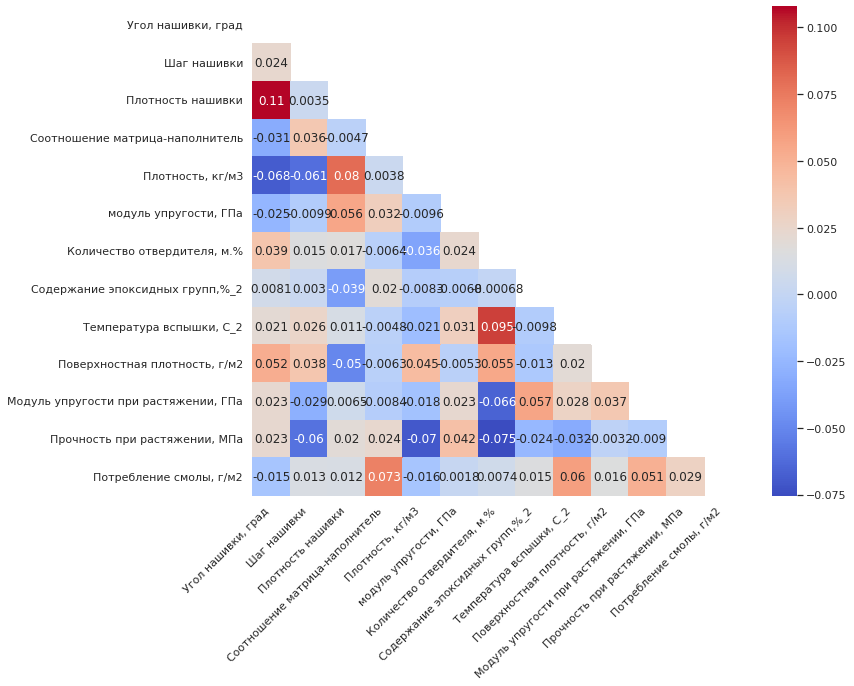

In [157]:
mask = np.triu(df_nup_bp.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_nup_bp.corr(), mask=mask, annot=True, square=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

Максимальная корреляция между Плотностью нашивки и углом нашивки и составляет 0.11, что говорит об отсутствии зависимости между этими данными. Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными.

Анализ на наличие выбросов

In [158]:
#Метод  3-х сигм
count_3s = 0
count_iq = 0
for column in df_nup_bp:
  d = df_nup_bp.loc[:, [column]]
  zscore = (df_nup_bp[column] - df_nup_bp[column].mean()) / df_nup_bp[column].std()
  d["3s"] = zscore.abs() > 3
  count_3s += d["3s"].sum()
print ("Метод 3-х сигм,выбросов:", count_3s)


Метод 3-х сигм,выбросов: 24


In [159]:
#Метод межквартильных расстояний
count_3s = 0
count_iq = 0
for column in df_nup_bp:
  d = df_nup_bp.loc[:, [column]]
  q1 = np.quantile(df_nup_bp[column], 0.25)
  q3 = np.quantile(df_nup_bp[column], 0.75)
  iqr = q3- q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  d["iq"] = (df_nup_bp[column] <= lower) | (df_nup_bp[column] >= upper)
  count_iq += d["iq"].sum()
print ("Метод межквартильных расстояний:", count_iq)

Метод межквартильных расстояний: 93


Метод 3-х сигм показал 24 выброса. Метод межквартильныхрасстояний показал 93 выброса. Выбросы могут быть "влиятельным" наблюдением, установить целесообразностьихисключения из анализа не представляется возможным в связи с отсутствием дополнительной информации. Выбросов не так много, можно их удалить

Очистка данных от выбросов

In [160]:
for col in df_nup_bp.columns:
    q75,q25 = np.percentile(df_nup_bp.loc[:,col],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_nup_bp.loc[df_nup_bp[col] < min,col] = np.nan
    df_nup_bp.loc[df_nup_bp[col] > max,col] = np.nan

In [161]:
#Выбросов не так много, можно их удалить
df_nup_bp = df_nup_bp.dropna(axis=0)

In [162]:
df_nup_bp.isnull().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

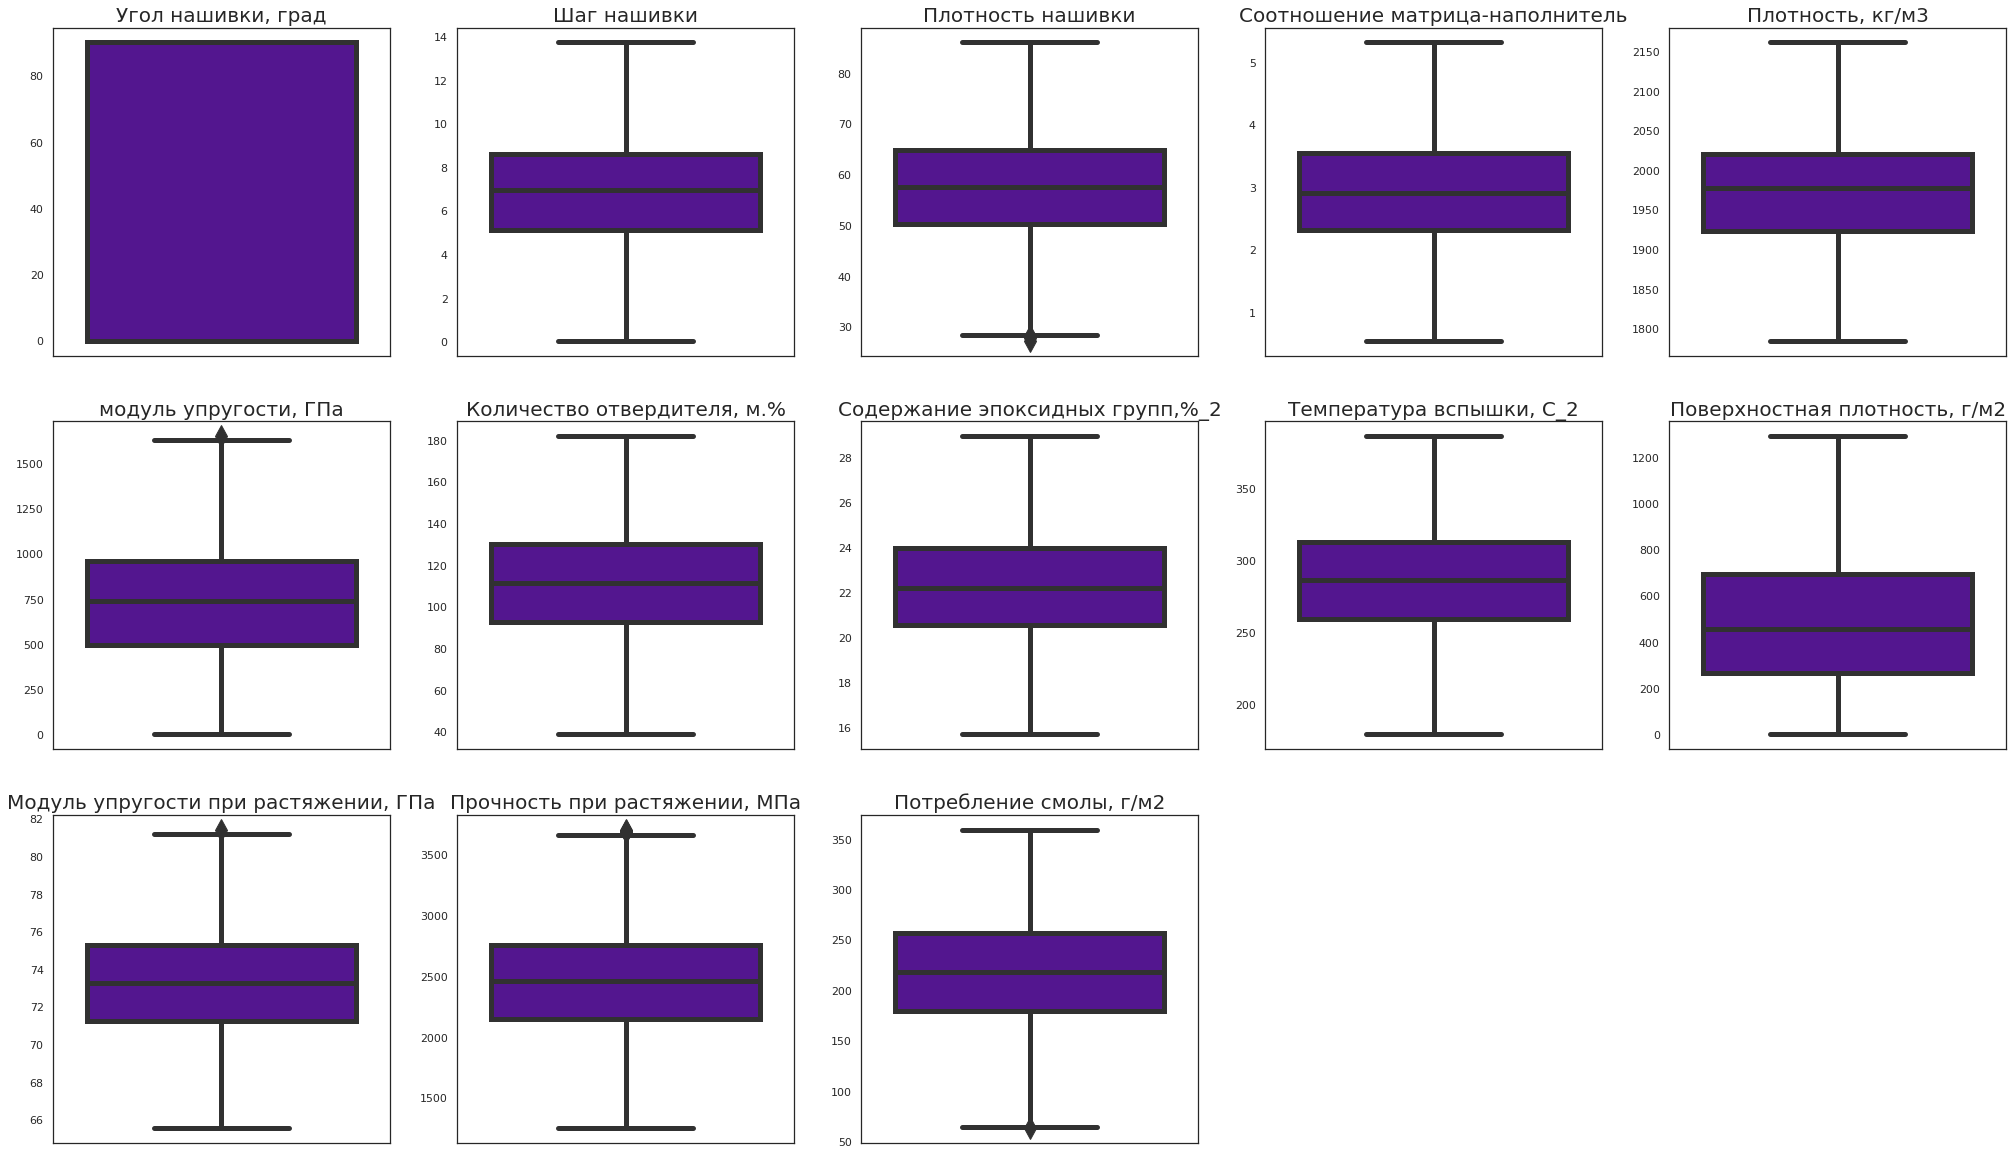

In [163]:
a = 5
b = 5
c = 1

plt.figure(figsize=(35,35))

for col in df_nup_bp.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.boxplot(data = df_nup_bp, y=df_nup_bp[col], fliersize=15, linewidth=5)
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c+=1

Нормализация данных с помощью метода MinMaxScaler

In [164]:
mms = MinMaxScaler()
df_nup_bp_norm = pd.DataFrame(mms.fit_transform(df_nup_bp), columns=df_nup_bp.columns, index=df_nup_bp.index)

Основные статистические характеристики (после нормализации)

In [165]:
#основные стат.характеристики датафрейма после нормализации 
df_nup_bp_norm.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
"Угол нашивки, град",936.0,0.51,0.50,0.0,0.00,1.00,1.00,1.0
Шаг нашивки,936.0,0.50,0.18,0.0,0.37,0.50,0.62,1.0
Плотность нашивки,936.0,0.51,0.19,0.0,0.39,0.52,0.64,1.0
Соотношение матрица-наполнитель,936.0,0.50,0.19,0.0,0.37,0.49,0.63,1.0
"Плотность, кг/м3",936.0,0.50,0.19,0.0,0.37,0.51,0.62,1.0
"модуль упругости, ГПа",936.0,0.45,0.20,0.0,0.30,0.45,0.58,1.0
"Количество отвердителя, м.%",936.0,0.50,0.19,0.0,0.38,0.51,0.64,1.0
"Содержание эпоксидных групп,%_2",936.0,0.49,0.18,0.0,0.37,0.49,0.62,1.0
"Температура вспышки, С_2",936.0,0.52,0.19,0.0,0.39,0.52,0.65,1.0
"Поверхностная плотность, г/м2",936.0,0.37,0.22,0.0,0.21,0.35,0.54,1.0


Построим тепловую карту коэффициентов корреляции нормализованного датафрейма

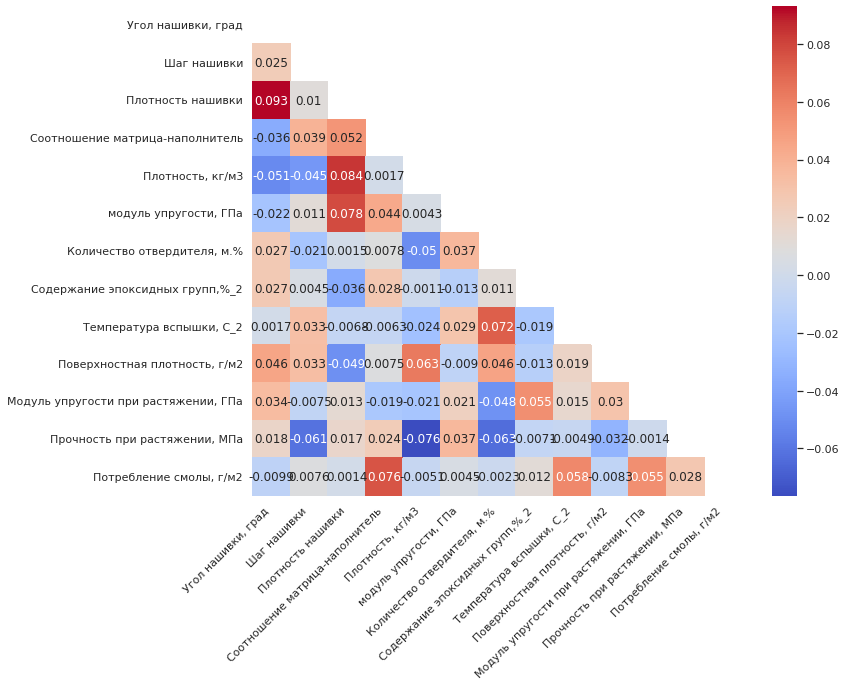

In [166]:
mask = np.triu(df_nup_bp_norm.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_nup_bp_norm.corr(), mask=mask, annot=True, square=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

Построим графики рассеяния нормализованного датафрейма

In [167]:
sns.set(
    style="white",
    palette="plasma"
)
g = sns.PairGrid(df_nup_bp_norm, diag_sharey = True, height=4)
g.map_diag(sns.histplot,kde = True)
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)
plt.show

Output hidden; open in https://colab.research.google.com to view.

Гистограммы плотности распределения переменных после нормализации

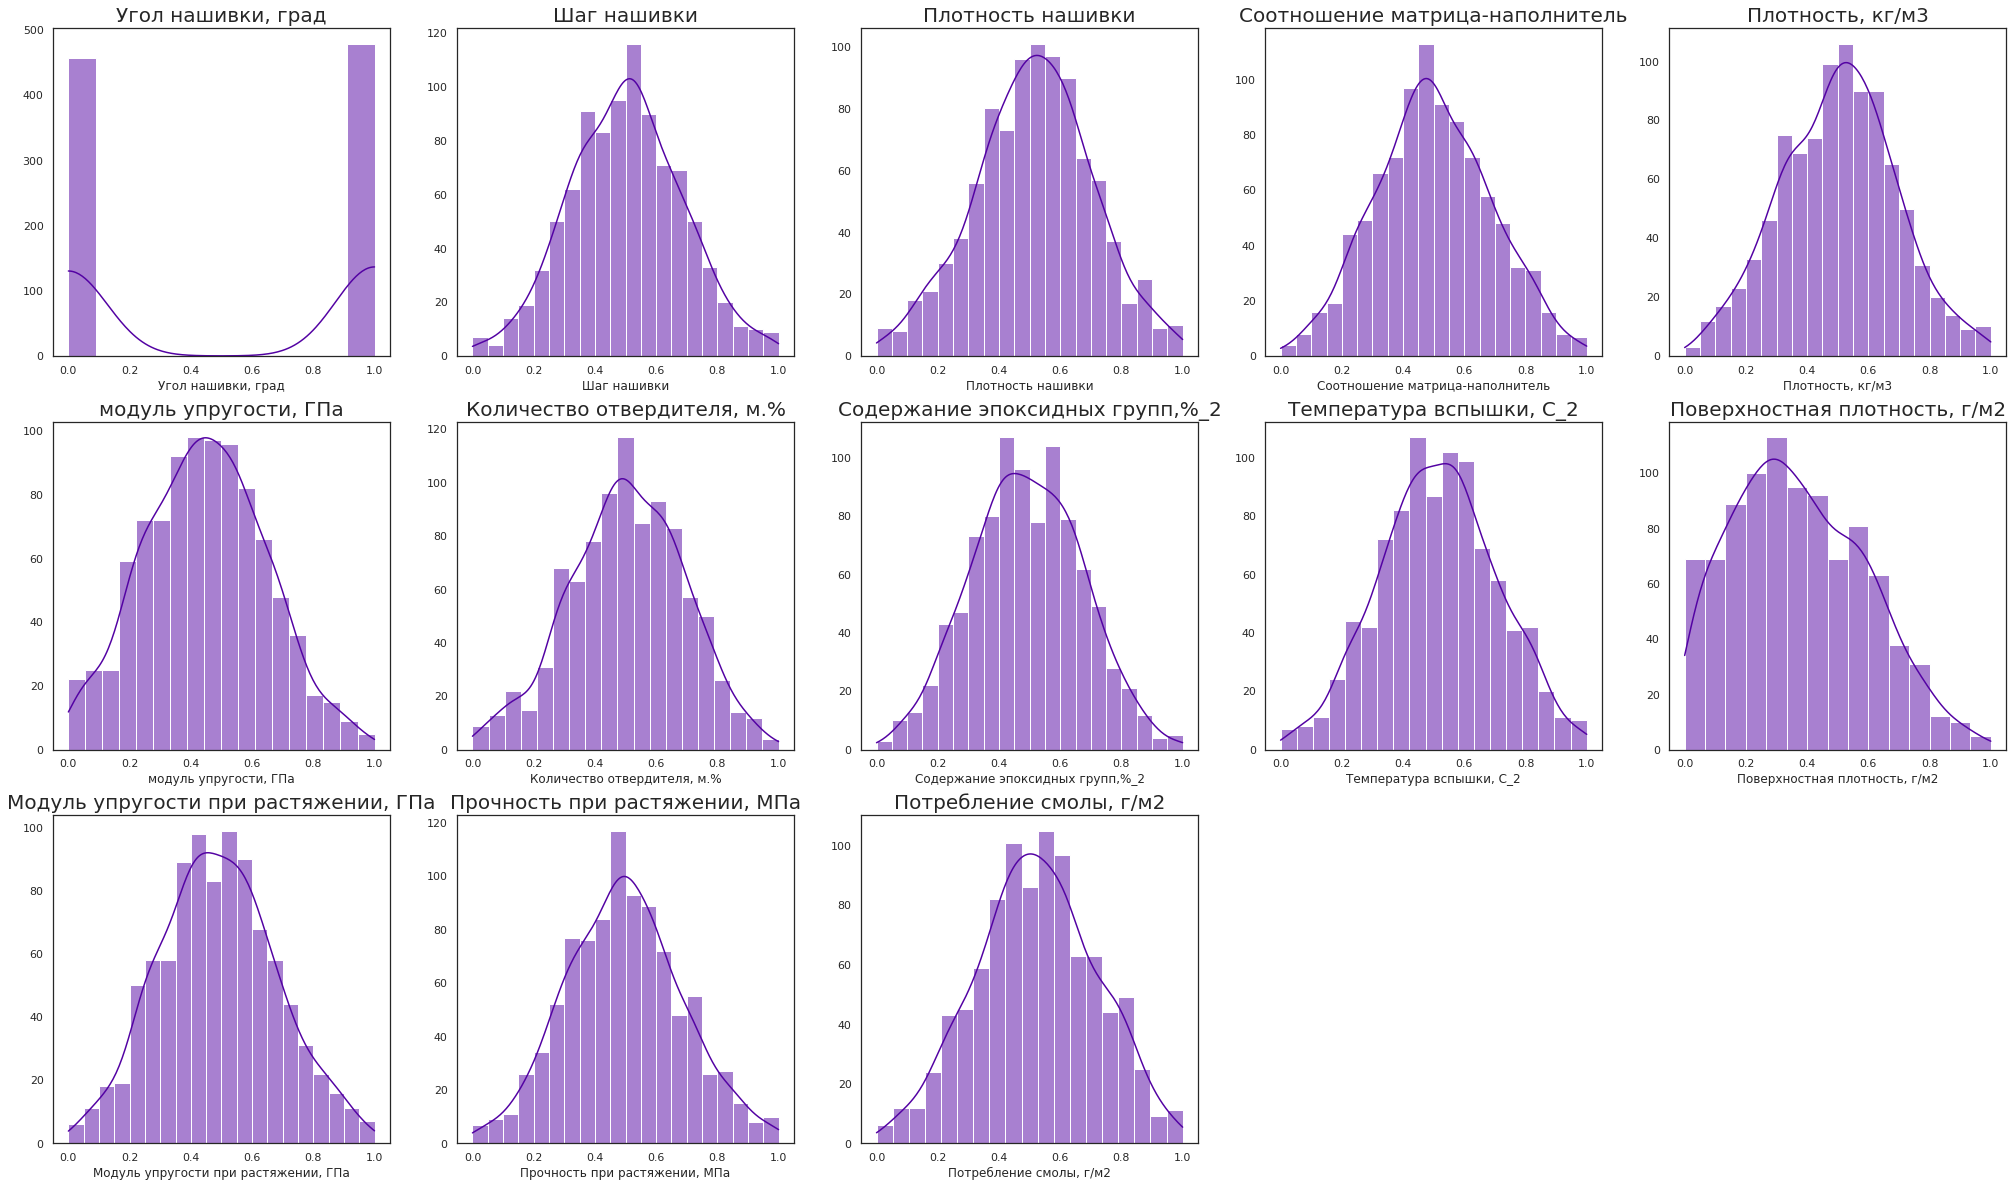

In [168]:
a = 5
b = 5
c = 1

plt.figure(figsize=(35,35))

for col in df_nup_bp_norm.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.histplot(data = df_nup_bp_norm[col], kde=True)
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c+=1

**Разработка и обучение моделей для прогноза модуля упругости при растяжении и прочности при растяжении** 

In [169]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

In [170]:
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras import Sequential
from keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

Разделим выборку на обучающую и тестовую в соотношении 70/30.
Выделим прогнозируемые (зависимые) переменные.

In [171]:
df_nup_bp_norm.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

In [172]:
#разделение выборки на обучающую (70%) и тестовую (30%), выделение прогнозируемых переменных
x_upr = df_nup_bp_norm.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df_nup_bp_norm.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = df_nup_bp_norm[['Модуль упругости при растяжении, ГПа']]
y_pr = df_nup_bp_norm[['Прочность при растяжении, МПа']]

X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=1)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=1)

Линейная регрессия

In [173]:
#линейная регрессия для "Модуль упругости при растяжении"
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_lr_upr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [174]:
lr_upr = GSCV_lr_upr.best_estimator_
print(f'R2-score LR для модуля упругости при растяжении: {lr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score LR для модуля упругости при растяжении: -0.021


In [175]:
models = pd.DataFrame()

In [176]:
lr_upr_result = pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)), 
   'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [177]:
models = pd.concat([models, lr_upr_result])

In [178]:
#линейная регрессия для "Прочность при растяжении"
GSCV_lr_pr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_pr.fit(X_train_pr, y_train_pr)
GSCV_lr_pr.best_params_

{'fit_intercept': 'True'}

In [179]:
lr_pr = GSCV_lr_pr.best_estimator_
print(f'R2-score LR для прочности при растяжении: {lr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score LR для прочности при растяжении: -0.021


In [180]:
lr_pr_result = pd.DataFrame({
   'Model': 'LinearRegression_pr', 
   'MAE': mean_absolute_error(y_test_pr, lr_pr.predict(X_test_pr)), 
   'R2 score': lr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [181]:
models = pd.concat([models, lr_pr_result])

Случайный лес

In [182]:
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
RSCV_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_upr.fit(X_train_upr, np.ravel(y_train_upr))
RSCV_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'bootstrap': 'True',
 'criterion': 'poisson',
 'max_depth': 1,
 'min_samples_leaf': 5,
 'min_samples_split': 25,
 'n_estimators': 670}

In [183]:
rfr_upr = RSCV_rfr_upr.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {rfr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score RFR для модуля упругости при растяжении: -0.021


Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение

In [184]:
rfr_upr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, rfr_upr.predict(X_test_upr)), 
   'R2 score': rfr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [185]:
models = pd.concat([models, rfr_upr_result])

In [186]:
RSCV_rfr_pr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_pr.fit(X_train_pr, np.ravel(y_train_pr))
RSCV_rfr_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'bootstrap': 'False',
 'criterion': 'squared_error',
 'max_depth': 1,
 'min_samples_leaf': 6,
 'min_samples_split': 40,
 'n_estimators': 660}

In [187]:
rfr_pr = RSCV_rfr_pr.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {rfr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score RFR для прочности при растяжении: -0.008


In [188]:
rfr_pr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, rfr_pr.predict(X_test_pr)), 
   'R2 score': rfr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [189]:
models = pd.concat([models, rfr_pr_result])

In [190]:
models_sort = models.sort_values(by=['MAE', 'R2 score'])
models_sort

,Model,MAE,R2 score
Прочность при растяжении,RandomForestRegressor_pr,0.149775,-0.008
Прочность при растяжении,LinearRegression_pr,0.150917,-0.021
Модуль упругости при растяжении,LinearRegression_upr,0.160518,-0.021
Модуль упругости при растяжении,RandomForestRegressor_upr,0.161359,-0.021


**Построение нейронной сети для предсказания "Соотношение матрица-наполнитель"(создание рекомендательной системы)**

In [191]:
df_nup_bp_norm.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

In [203]:
x2 = df_nup_bp_norm.drop(['Соотношение матрица-наполнитель'], axis=1)
y2 = df_nup_bp_norm[['Соотношение матрица-наполнитель']]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=1)

In [204]:
import tensorflow as tf
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold

In [205]:
#1 модель НС (альтернативный вариант)
#model = Sequential()
#model.add(Dense(256, input_dim = x2_train.shape[1], activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(128,  activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(1, activation= 'sigmoid'))

#model.compile(optimizer='adam', loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])

#model.summary()

In [206]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [207]:
x2_train_norm = normalizer.adapt(np.array(x2_train))

In [208]:
#2 модель НС (основной вариант)
model = Sequential(x2_train_norm)

model.add(Dense(128))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(128, activation='selu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='selu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='selu'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(16, activation='selu'))
model.add(BatchNormalization())
model.add(Dense(1))
model.add(Activation('selu'))

In [209]:
model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

Epoch 1/100
22/22 [==============================] - 2s 14ms/step - loss: 0.6290 - val_loss: 0.1780
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2453 - val_loss: 0.1640
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2056 - val_loss: 0.1635
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1827 - val_loss: 0.1631
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1769 - val_loss: 0.1612
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1644 - val_loss: 0.1664
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1583 - val_loss: 0.1620
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1522 - val_loss: 0.1629
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1521 - val_loss: 0.1664
Epoch 10/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1483 - val_loss: 0.1786
Epoch 11

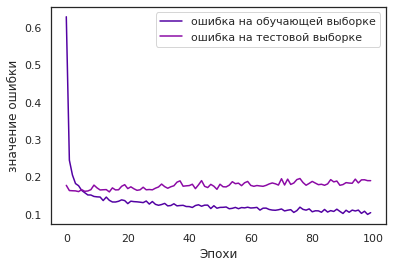

In [210]:
history = model.fit(x2_train,
                    y2_train,
                    batch_size = 30,
                    epochs = 100,
                    validation_data = (x2_test, y2_test))
print(history.history.keys())
plt.plot(history.history['loss'],
         label = 'ошибка на обучающей выборке')
plt.plot(history.history['val_loss'],
         label = 'ошибка на тестовой выборке')
plt.xlabel('Эпохи')
plt.ylabel('значение ошибки')
plt.legend()
plt.show()

In [201]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_15 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_16 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 64)               

In [211]:
y2_pred_model=model.predict(x2_test)

print('Model Results:')
print('Model_MAE: ', round(mean_absolute_error(y2_test, y2_pred_model)))
print('Model_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y2_test, y2_pred_model)))
print("Test score: {:.2f}".format(mean_squared_error(y2_test, y2_pred_model)))

Model Results:
Model_MAE:  0
Model_MAPE: 0.50
Test score: 0.05


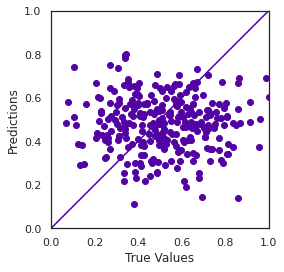

In [212]:
test_predictions = model.predict(x2_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y2_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [213]:
print(f'Model MAE: {model.evaluate(x2_test, y2_test)}')

9/9 [==============================] - 0s 2ms/step - loss: 0.1905
Model MAE: 0.1904878318309784


Сохраняем модель

In [219]:
model.save("/content/drive/MyDrive/myVKR/models/my_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/myVKR/models/my_model/assets


In [220]:
import keras as keras

In [221]:
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/myVKR/models/my_model")

In [222]:
reconstructed_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_20 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_21 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_26 (Dense)            (None, 64)               